
## Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('../data/togo-dapaong_qc.csv', parse_dates=True, index_col=0)
df.head()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
Timestamp,,,,,,,,,,,,,,,,,,
2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


## Summary Statistics & Missing-Value Report

In [3]:
# Summary statistics for numeric columns
summary_stats = df.describe()
summary_stats


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [4]:
# Calculate percentage of missing values
missing_percent = (df.isna().sum() / len(df)) * 100
missing_report = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

missing_report


,missing_count,missing_percent
Comments,525600,100.0
GHI,0,0.0
DNI,0,0.0
DHI,0,0.0
ModB,0,0.0
ModA,0,0.0
RH,0,0.0
WS,0,0.0
WSgust,0,0.0
Tamb,0,0.0


In [5]:
# Columns with more than 5% missing data
high_missing = missing_report[missing_report['missing_percent'] > 5]
high_missing

,missing_count,missing_percent
Comments,525600,100.0


## Cleaning & Outlier Handling Steps

In [6]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df[key_cols].isna().sum()


GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
dtype: int64

In [7]:
# Compute Z-scores and convert to a DataFrame (important!)
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))

# Wrap the z-scores in a DataFrame with same index and columns as df
z_df = pd.DataFrame(z_scores, columns=key_cols, index=df.index)

# Create a boolean mask for outliers
outliers = z_df > 3


In [8]:
# Replace outliers with the median of each column
for col in key_cols:
    median_val = df[col].median()
    df.loc[outliers[col], col] = median_val

In [9]:
print("Outliers replaced per column:")
print(outliers.sum())


Outliers replaced per column:
GHI        305
DNI       1062
DHI       3415
ModA       137
ModB       206
WS        3510
WSgust    3915
dtype: int64


In [10]:
df.to_csv('../data/togo_clean.csv', index=False)

## Time Series Analysis


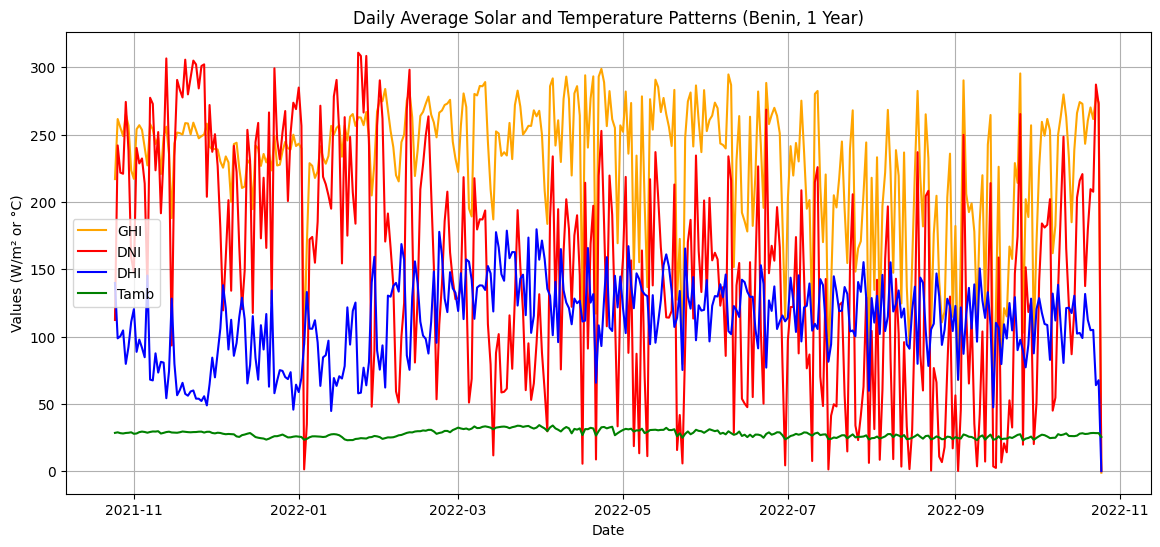

In [11]:
# Resample daily mean values
df_daily = df.resample('D').mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df_daily.index, df_daily['GHI'], label='GHI', color='orange')
plt.plot(df_daily.index, df_daily['DNI'], label='DNI', color='red')
plt.plot(df_daily.index, df_daily['DHI'], label='DHI', color='blue')
plt.plot(df_daily.index, df_daily['Tamb'], label='Tamb', color='green')

plt.title('Daily Average Solar and Temperature Patterns (Benin, 1 Year)')
plt.xlabel('Date')
plt.ylabel('Values (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_15200\1616337682.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


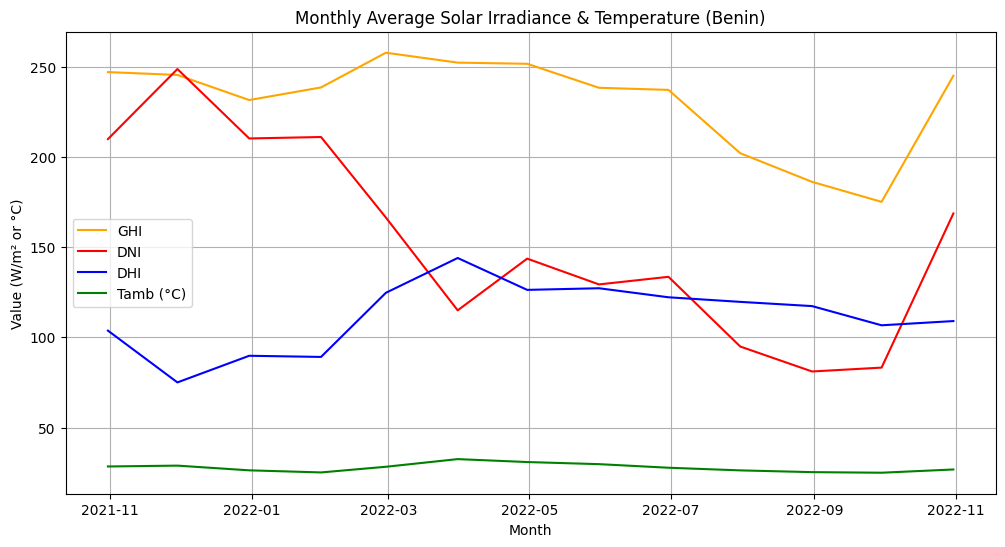

In [12]:
import matplotlib.pyplot as plt

# Compute monthly averages
df_monthly = df.resample('M').mean()

plt.figure(figsize=(12,6))
plt.plot(df_monthly.index, df_monthly['GHI'], label='GHI', color='orange')
plt.plot(df_monthly.index, df_monthly['DNI'], label='DNI', color='red')
plt.plot(df_monthly.index, df_monthly['DHI'], label='DHI', color='blue')
plt.plot(df_monthly.index, df_monthly['Tamb'], label='Tamb (°C)', color='green')

plt.title('Monthly Average Solar Irradiance & Temperature (Benin)')
plt.xlabel('Month')
plt.ylabel('Value (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


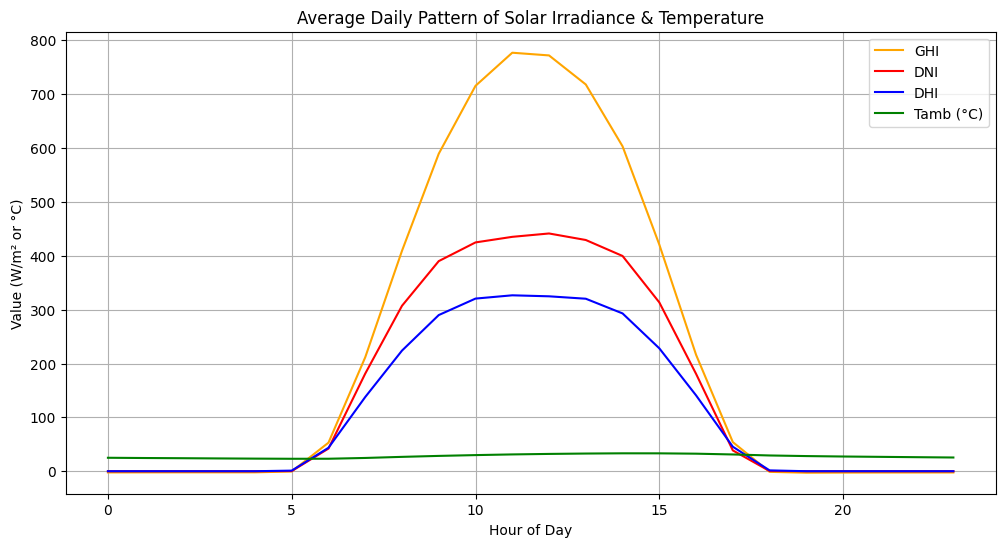

In [13]:
# Extract hour of day
df['hour'] = df.index.hour

# Group by hour and compute mean
df_hourly = df.groupby('hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

plt.figure(figsize=(12,6))
plt.plot(df_hourly.index, df_hourly['GHI'], label='GHI', color='orange')
plt.plot(df_hourly.index, df_hourly['DNI'], label='DNI', color='red')
plt.plot(df_hourly.index, df_hourly['DHI'], label='DHI', color='blue')
plt.plot(df_hourly.index, df_hourly['Tamb'], label='Tamb (°C)', color='green')

plt.title('Average Daily Pattern of Solar Irradiance & Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Value (W/m² or °C)')
plt.legend()
plt.grid(True)
plt.show()


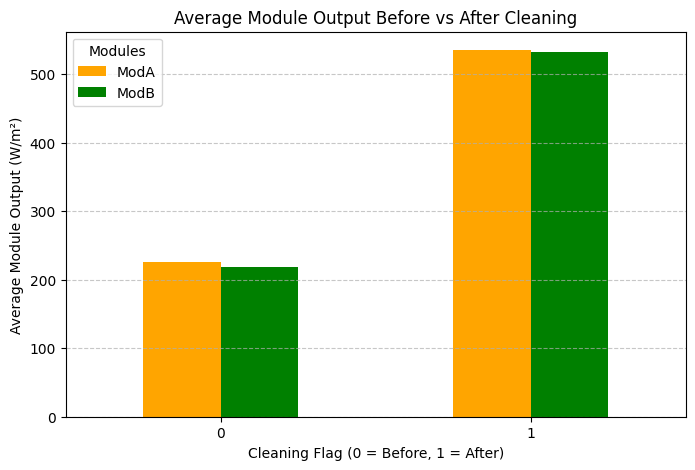

In [14]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()


cleaning_impact.plot(
    kind='bar',
    figsize=(8,5),
    color=['orange', 'green']
)

plt.title('Average Module Output Before vs After Cleaning')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Average Module Output (W/m²)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Modules')
plt.show()





## Correlation & Relationship Analysis

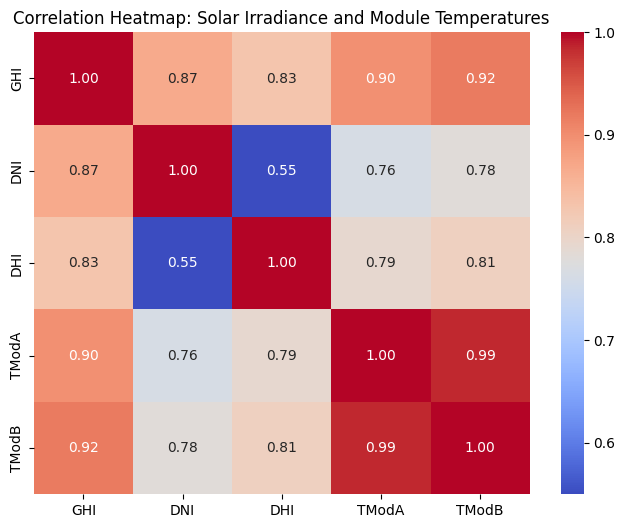

In [15]:
# Select relevant columns
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Compute correlation matrix
corr = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Solar Irradiance and Module Temperatures")
plt.show()

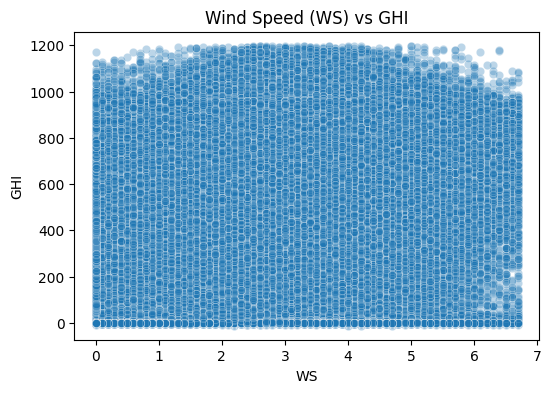

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WS', y='GHI', alpha=0.3)
plt.title('Wind Speed (WS) vs GHI')
plt.show()


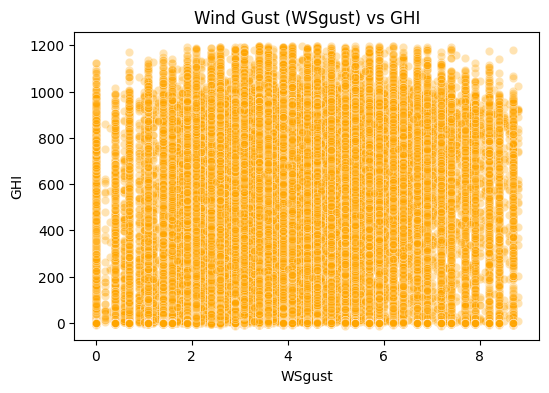

In [17]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WSgust', y='GHI', alpha=0.3, color='orange')
plt.title('Wind Gust (WSgust) vs GHI')
plt.show()


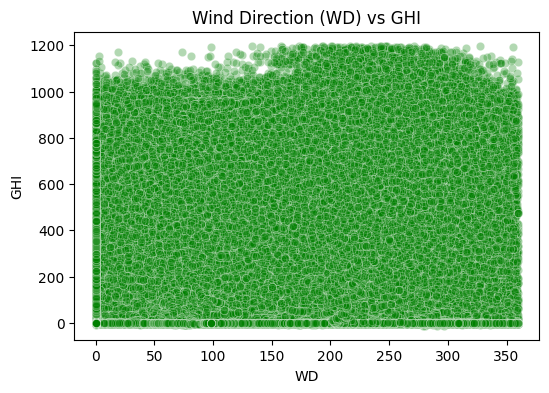

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='WD', y='GHI', alpha=0.3, color='green')
plt.title('Wind Direction (WD) vs GHI')
plt.show()


## Wind & Distribution Analysis

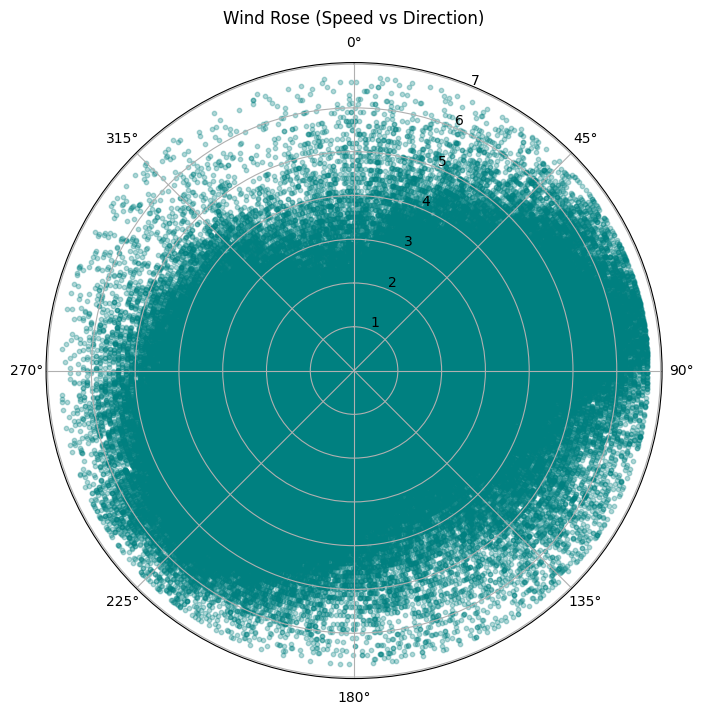

In [19]:
# Drop missing values
wind_df = df[['WD', 'WS']].dropna()

# Convert to radians for polar plotting
wind_dir_rad = np.deg2rad(wind_df['WD'])

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('N')   # 0° at North
ax.set_theta_direction(-1)        # Clockwise

# Plot wind speed vs direction
ax.scatter(wind_dir_rad, wind_df['WS'], alpha=0.3, s=10, color='teal')

ax.set_title("Wind Rose (Speed vs Direction)", va='bottom')
plt.show()

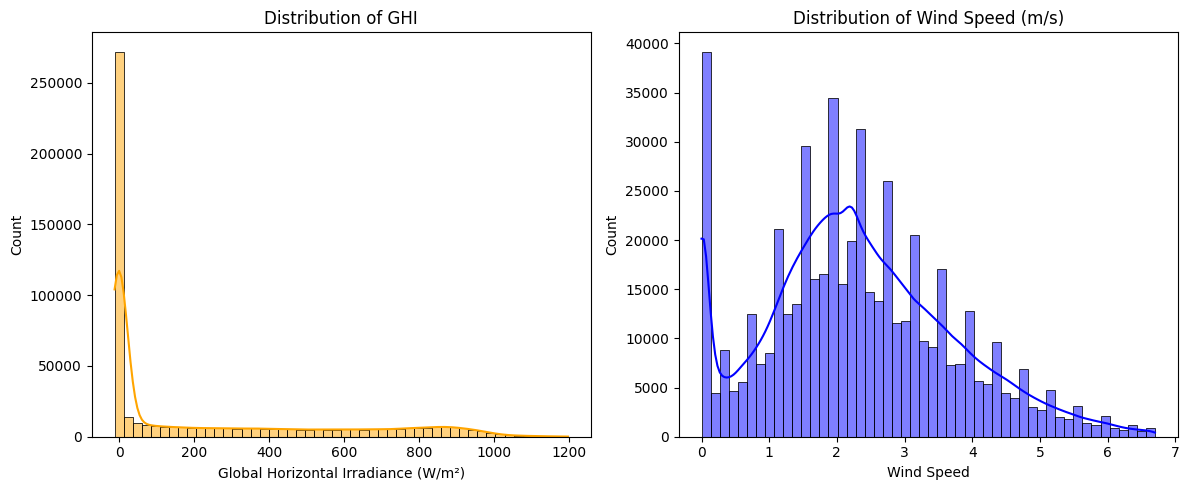

In [20]:
#
plt.figure(figsize=(12,5))

# Histogram for GHI
plt.subplot(1,2,1)
sns.histplot(df['GHI'], bins=50, kde=True, color='orange')
plt.title('Distribution of GHI')
plt.xlabel('Global Horizontal Irradiance (W/m²)')

# Histogram for WS
plt.subplot(1,2,2)
sns.histplot(df['WS'], bins=50, kde=True, color='blue')
plt.title('Distribution of Wind Speed (m/s)')
plt.xlabel('Wind Speed')

plt.tight_layout()
plt.show()

## Correlation between RH, Tamb, and GHI

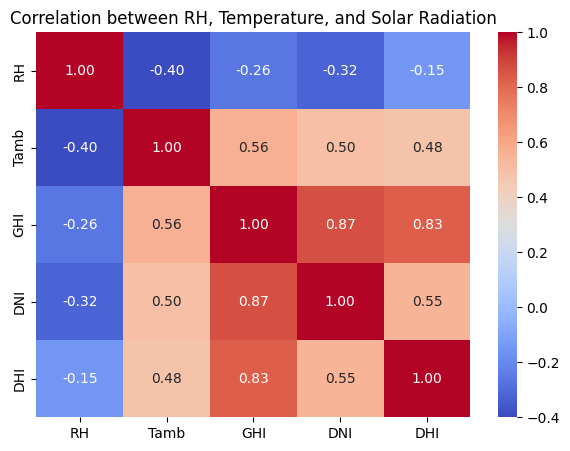

In [21]:
# Select key columns
temp_corr = df[['RH', 'Tamb', 'GHI', 'DNI', 'DHI']].corr()

# Plot correlation heatmap
plt.figure(figsize=(7,5))
sns.heatmap(temp_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between RH, Temperature, and Solar Radiation')
plt.show()

### Scatter Plots — Relationship Patterns

Let’s visualize those relationships more directly.

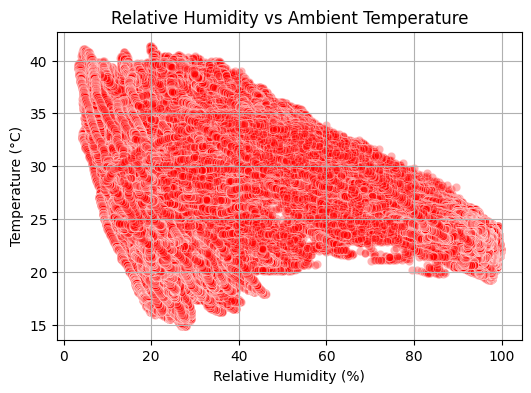

In [22]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='RH', y='Tamb', alpha=0.3, color='red')
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


### RH vs Solar Irradiance (GHI)

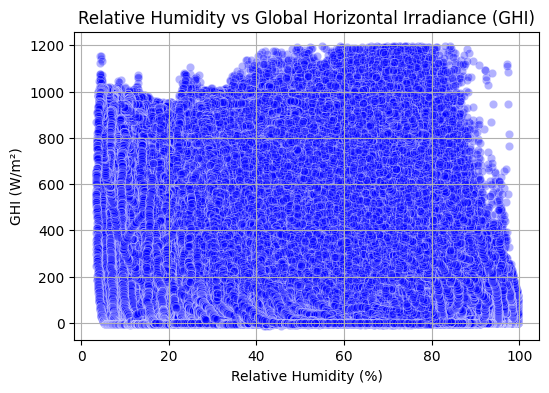

In [23]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='RH', y='GHI', alpha=0.3, color='blue')
plt.title('Relative Humidity vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('GHI (W/m²)')
plt.grid(True)
plt.show()


## Basic Bubble Chart — RH as Bubble Size

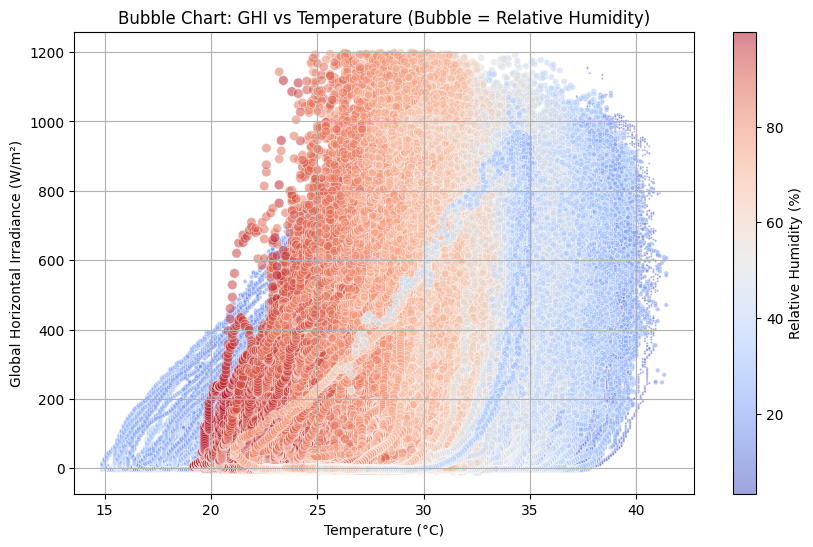

In [24]:
plt.figure(figsize=(10,6))

# Scale bubble sizes for better visibility (divide by constant)
plt.scatter(
    df['Tamb'], 
    df['GHI'], 
    s=df['RH'] / 2,     # bubble size (scaled)
    c=df['RH'],         # color by humidity
    cmap='coolwarm', 
    alpha=0.5, 
    edgecolors='w', 
    linewidth=0.5
)

plt.title("Bubble Chart: GHI vs Temperature (Bubble = Relative Humidity)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.colorbar(label='Relative Humidity (%)')
plt.grid(True)
plt.show()